In [1]:
# Network-x imports
from networkx.readwrite.graphml import read_graphml
import networkx as nx

# Graph Kernels import
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath, RandomWalk, SubgraphMatching, NeighborhoodHash, GraphletSampling, PyramidMatch, SvmTheta

# SVM imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# general imports
import os

/home/suraj/apps/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.lfw module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Preprocessing

## Data Loading

In [2]:
graphs = list()
labels = list()
tags = {'Bubble': 0, 'Insertion': 1, 'Selection': 2, 'Counting': 3, 'Merge': 4, 'Quick': 5}

for algo in os.listdir('CFG'):
    count = 1
    for file in os.listdir('CFG/'+algo):
        graphs.append(read_graphml('CFG/'+algo+'/'+file))
        labels.append(tags[algo])
        if(count == 700):
            break
        count += 1

In [3]:
len(graphs), len(labels)

(4200, 4200)

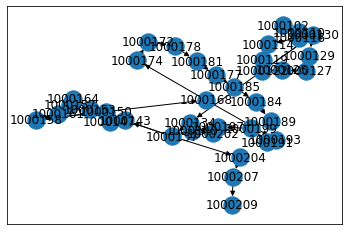

In [4]:
nx.draw_networkx(graphs[0])

In [5]:
G_train, G_test, Y_train, Y_test = train_test_split(graphs, labels, test_size=0.20, random_state=42)
len(G_train), len(G_test), len(Y_train), len(Y_test)

(3360, 840, 3360, 840)

## Convert Network-X Graph to Adj List Representation of GraKel

In [6]:
G_train = list(graph_from_networkx(G_train, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test, node_labels_tag='label'))

In [7]:
G_train[0]

[{'1000102': {'1000113': 1.0},
  '1000111': {'1000120': 1.0},
  '1000113': {'1000111': 1.0},
  '1000115': {'1000129': 1.0},
  '1000117': {'1000115': 1.0},
  '1000118': {'1000117': 1.0},
  '1000119': {'1000118': 1.0},
  '1000120': {'1000119': 1.0},
  '1000124': {'1000134': 1.0},
  '1000126': {'1000124': 1.0},
  '1000127': {'1000126': 1.0},
  '1000128': {'1000127': 1.0},
  '1000129': {'1000128': 1.0},
  '1000134': {'1000137': 1.0},
  '1000137': {'1000143': 1.0, '1000148': 1.0},
  '1000140': {'1000137': 1.0},
  '1000142': {'1000140': 1.0},
  '1000143': {'1000142': 1.0},
  '1000148': {'1000151': 1.0},
  '1000151': {'1000162': 1.0, '1000174': 1.0},
  '1000154': {'1000151': 1.0},
  '1000157': {'1000170': 1.0},
  '1000159': {'1000157': 1.0},
  '1000160': {'1000159': 1.0},
  '1000162': {'1000160': 1.0},
  '1000165': {'1000154': 1.0},
  '1000166': {'1000165': 1.0},
  '1000168': {'1000166': 1.0},
  '1000170': {'1000168': 1.0},
  '1000174': {'1000177': 1.0},
  '1000177': {'1000183': 1.0, '1000196

# Kernel Computation & SVM

## 1. Compute the Weisfeiler Lehman Kernel

In [8]:
# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman()

In [9]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [10]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
# Test classifier
Y_pred = clf.predict(K_test)

In [12]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8678571428571429


In [13]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[115   6   5   0   3   1]
 [  7  93   3   1   5   1]
 [ 10   9 128   0  12   4]
 [  0   2   1 146   7   0]
 [  0   1   3   2 125   6]
 [  1   1   3   0  17 122]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       130
           1       0.83      0.85      0.84       110
           2       0.90      0.79      0.84       163
           3       0.98      0.94      0.96       156
           4       0.74      0.91      0.82       137
           5       0.91      0.85      0.88       144

    accuracy                           0.87       840
   macro avg       0.87      0.87      0.87       840
weighted avg       0.87      0.87      0.87       840



In [18]:
K_train.shape

(3360, 3360)

## 2. The random walk kernel class (Time Consuming)

In [19]:
gk = RandomWalk()

In [18]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

KeyboardInterrupt: 

In [76]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
# Test classifier
Y_pred = clf.predict(K_test)

In [78]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[46 19 35  2 18 10]
 [ 8 69 15  4 14  0]
 [21 24 85  0 25  8]
 [10 35 11 71 10 19]
 [ 3 29  1  0 65 39]
 [ 0  2  1  7 59 75]]
              precision    recall  f1-score   support

           0       0.52      0.35      0.42       130
           1       0.39      0.63      0.48       110
           2       0.57      0.52      0.55       163
           3       0.85      0.46      0.59       156
           4       0.34      0.47      0.40       137
           5       0.50      0.52      0.51       144

    accuracy                           0.49       840
   macro avg       0.53      0.49      0.49       840
weighted avg       0.54      0.49      0.50       840



## 3. Subgraph Matching

In [84]:
gk = SubgraphMatching(ke=None)

In [85]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [86]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
# Test classifier
Y_pred = clf.predict(K_test)

In [88]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[110   5   8   1   4   2]
 [ 10  90   3   2   5   0]
 [ 14  15 123   2   8   1]
 [  0   2   1 147   6   0]
 [  2   1   2   1 126   5]
 [  3   3   2   0  16 120]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.78      0.82      0.80       110
           2       0.88      0.75      0.81       163
           3       0.96      0.94      0.95       156
           4       0.76      0.92      0.83       137
           5       0.94      0.83      0.88       144

    accuracy                           0.85       840
   macro avg       0.85      0.85      0.85       840
weighted avg       0.86      0.85      0.85       840



## 4. NeighborhoodHash Kernel

In [90]:
gk = NeighborhoodHash()

In [91]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

/home/suraj/apps/anaconda3/lib/python3.7/site-packages/grakel-0.1b7-py3.7-linux-x86_64.egg/grakel/kernels/neighborhood_hash.py:170: UserWarning: Number of labels is smaller thanthe biggest possible.. Collisions will appear on the new labels.
  warnings.warn('Number of labels is smaller than'


In [92]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
# Test classifier
Y_pred = clf.predict(K_test)

In [94]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[106   7   7   0   7   3]
 [  7  94   2   0   2   5]
 [  9  10 116   0  18  10]
 [  4   4   0 138   7   3]
 [  4   3   2   1 116  11]
 [  3   0   0   0  17 124]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       130
           1       0.80      0.85      0.82       110
           2       0.91      0.71      0.80       163
           3       0.99      0.88      0.94       156
           4       0.69      0.85      0.76       137
           5       0.79      0.86      0.83       144

    accuracy                           0.83       840
   macro avg       0.83      0.83      0.83       840
weighted avg       0.84      0.83      0.83       840



## 5.  GraphletSampling Kernel

In [97]:
gk = GraphletSampling()

In [98]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [99]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [100]:
# Test classifier
Y_pred = clf.predict(K_test)

In [101]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[103   4   8   2   9   4]
 [ 10  85   4   1   7   3]
 [ 17   7 120   0  11   8]
 [ 10   5   3 132   5   1]
 [  7   3   2   2  84  39]
 [  4   6   0   0   7 127]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       130
           1       0.77      0.77      0.77       110
           2       0.88      0.74      0.80       163
           3       0.96      0.85      0.90       156
           4       0.68      0.61      0.65       137
           5       0.70      0.88      0.78       144

    accuracy                           0.78       840
   macro avg       0.78      0.77      0.77       840
weighted avg       0.79      0.78      0.78       840



## 6. SvmTheta Match

In [111]:
gk = SvmTheta()

In [ ]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [ ]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 